In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime
import warnings
import math
from scipy import stats
import missingno as msno
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score,cross_val_predict, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import  Lasso

warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/SeoulBikeData.csv',encoding='latin1')

In [ ]:
data.shape

(8760, 14)

In [ ]:
data.head(5)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
data.dtypes

Date                          object
Rented Bike Count              int64
Hour                           int64
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day               object
dtype: object

In [ ]:
"""There are lot of special chars in columns, so its better to change column name and also need to change "date" column dtype as date"""
data.columns = [i.split("(")[0].strip().title().replace(" ","_") for i in [*data.columns]]
data.columns

Index(['Date', 'Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity',
       'Wind_Speed', 'Visibility', 'Dew_Point_Temperature', 'Solar_Radiation',
       'Rainfall', 'Snowfall', 'Seasons', 'Holiday', 'Functioning_Day'],
      dtype='object')

In [ ]:
"""date and other object column dtype has been changed to their respective format"""
data.Date = pd.to_datetime(data.Date, format = "%d/%m/%Y")
categoryvariablelist = ["Seasons","Holiday","Functioning_Day"]
for var in categoryvariablelist:
  data[var] = data[var].astype("category")
data.dtypes

Date                     datetime64[ns]
Rented_Bike_Count                 int64
Hour                              int64
Temperature                     float64
Humidity                          int64
Wind_Speed                      float64
Visibility                        int64
Dew_Point_Temperature           float64
Solar_Radiation                 float64
Rainfall                        float64
Snowfall                        float64
Seasons                        category
Holiday                        category
Functioning_Day                category
dtype: object

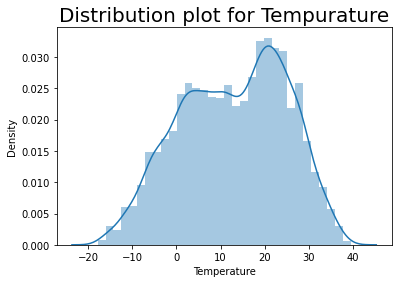

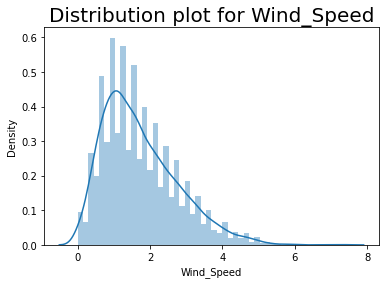

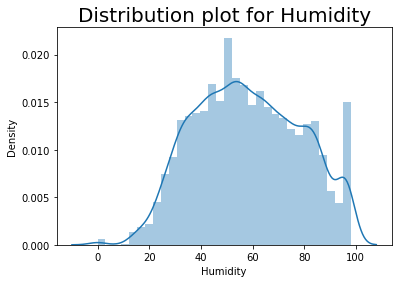

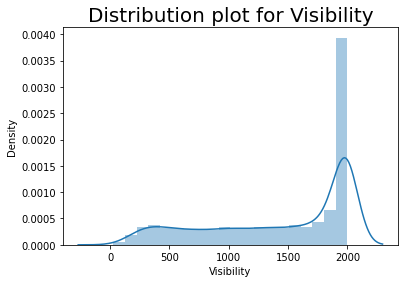

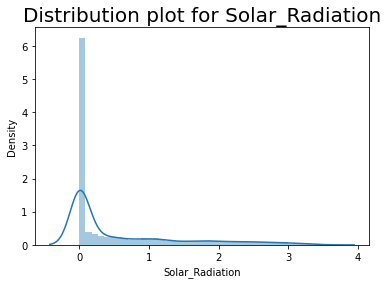

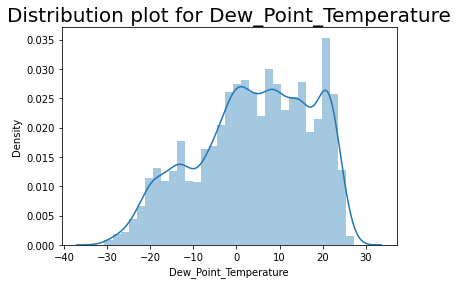

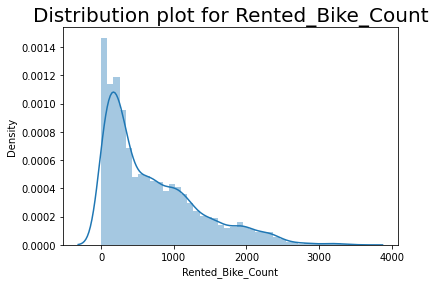

In [ ]:
sns.distplot(data.Temperature)
plt.title("Distribution plot for Tempurature",fontsize=20)
plt.show();

sns.distplot(data.Wind_Speed)
plt.title("Distribution plot for Wind_Speed",fontsize=20)
plt.show();

sns.distplot(data.Humidity)
plt.title("Distribution plot for Humidity",fontsize=20)
plt.show();

sns.distplot(data.Visibility)
plt.title("Distribution plot for Visibility",fontsize=20)
plt.show();

sns.distplot(data.Solar_Radiation)
plt.title("Distribution plot for Solar_Radiation",fontsize=20)
plt.show();

sns.distplot(data.Dew_Point_Temperature)
plt.title("Distribution plot for Dew_Point_Temperature",fontsize=20)
plt.show();

sns.distplot(data.Rented_Bike_Count)
plt.title("Distribution plot for Rented_Bike_Count",fontsize=20)
plt.show();

Feature Engineering

In [ ]:
data.insert(1,"Day", data.Date.dt.day)
data.insert(2,"month", data.Date.dt.month)
data.insert(3,"year", data.Date.dt.year)
data.insert(4,"WeekDay", data["Date"].dt.day_name())


In [ ]:
data.dtypes

Date                     datetime64[ns]
Day                               int64
month                             int64
year                              int64
WeekDay                          object
Rented_Bike_Count                 int64
Hour                              int64
Temperature                     float64
Humidity                          int64
Wind_Speed                      float64
Visibility                        int64
Dew_Point_Temperature           float64
Solar_Radiation                 float64
Rainfall                        float64
Snowfall                        float64
Seasons                        category
Holiday                        category
Functioning_Day                category
dtype: object

In [ ]:
data.head(5)

,Date,Day,month,year,WeekDay,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_Speed,Visibility,Dew_Point_Temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day
0,2017-12-01,1,12,2017,Friday,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-12-01,1,12,2017,Friday,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-12-01,1,12,2017,Friday,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-12-01,1,12,2017,Friday,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-12-01,1,12,2017,Friday,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
data.Holiday.replace(['Holiday','No Holiday'],[0,1], inplace = True)

In [ ]:
data.Functioning_Day = data.Functioning_Day.map({"No":0, "Yes":1})

In [ ]:
data.year = data.year.map({2017:0,2018:1})

In [ ]:
data.Seasons = data.Seasons.map({"Winter":1,"Autumn":2,"Spring":3,"Summer":4})

In [ ]:
data.insert(2, 'label_day_night', data['Hour'].apply(lambda x : 0 if (x<7) else( 1)))

In [ ]:
data["Working_Day"] = 1
data.loc[(data.WeekDay == "Saturday")|(data.WeekDay == "Sunday"), "Working_Day"] = 0

In [ ]:
data.Humidity[data.Humidity == 0] = data.Humidity.mean()

In [ ]:
data.head()

,Date,Day,label_day_night,month,year,WeekDay,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_Speed,Visibility,Dew_Point_Temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,Working_Day
0,2017-12-01,1,0,12,0,Friday,254,0,-5.2,37.0,2.2,2000,-17.6,0.0,0.0,0.0,1,1,1,1
1,2017-12-01,1,0,12,0,Friday,204,1,-5.5,38.0,0.8,2000,-17.6,0.0,0.0,0.0,1,1,1,1
2,2017-12-01,1,0,12,0,Friday,173,2,-6.0,39.0,1.0,2000,-17.7,0.0,0.0,0.0,1,1,1,1
3,2017-12-01,1,0,12,0,Friday,107,3,-6.2,40.0,0.9,2000,-17.6,0.0,0.0,0.0,1,1,1,1
4,2017-12-01,1,0,12,0,Friday,78,4,-6.0,36.0,2.3,2000,-18.6,0.0,0.0,0.0,1,1,1,1


In [ ]:
category_var_list = ["WeekDay"]
for i in category_var_list:
  data[i] = data[i].astype("category")

In [ ]:
for var in category_var_list:
  dum_col = pd.get_dummies(data[var])
  data = pd.concat([data, dum_col], axis = 1)
  data.drop(var, axis=1, inplace=True)

In [ ]:
data.columns

Index(['Date', 'Day', 'label_day_night', 'month', 'year', 'Rented_Bike_Count',
       'Hour', 'Temperature', 'Humidity', 'Wind_Speed', 'Visibility',
       'Dew_Point_Temperature', 'Solar_Radiation', 'Rainfall', 'Snowfall',
       'Seasons', 'Holiday', 'Functioning_Day', 'Working_Day', 'Friday',
       'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

In [ ]:
columns = data.columns.tolist()
columns.append(columns.pop(5))
data = data[columns]

In [ ]:
data.columns

Index(['Date', 'Day', 'label_day_night', 'month', 'year', 'Hour',
       'Temperature', 'Humidity', 'Wind_Speed', 'Visibility',
       'Dew_Point_Temperature', 'Solar_Radiation', 'Rainfall', 'Snowfall',
       'Seasons', 'Holiday', 'Functioning_Day', 'Working_Day', 'Friday',
       'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday',
       'Rented_Bike_Count'],
      dtype='object')

In [ ]:
data.drop("Date",axis=1, inplace=True)

In [ ]:
numerical_feature = ["Temperature","Humidity","Rainfall","Visibility","Dew_Point_Temperature","Wind_Speed","Solar_Radiation","Snowfall"]
scale = StandardScaler()
data[numerical_feature] = scale.fit_transform(data[numerical_feature])

In [ ]:
data.head()

,Day,label_day_night,month,year,Hour,Temperature,Humidity,Wind_Speed,Visibility,Dew_Point_Temperature,...,Functioning_Day,Working_Day,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Rented_Bike_Count
0,1,0,12,0,0,-1.513957,-1.056465,0.458476,0.925871,-1.659605,...,1,1,1,0,0,0,0,0,0,254
1,1,0,12,0,1,-1.539074,-1.006957,-0.892561,0.925871,-1.659605,...,1,1,1,0,0,0,0,0,0,204
2,1,0,12,0,2,-1.580936,-0.957449,-0.699556,0.925871,-1.667262,...,1,1,1,0,0,0,0,0,0,173
3,1,0,12,0,3,-1.597680,-0.907941,-0.796059,0.925871,-1.659605,...,1,1,1,0,0,0,0,0,0,107
4,1,0,12,0,4,-1.580936,-1.105973,0.554978,0.925871,-1.736177,...,1,1,1,0,0,0,0,0,0,78


In [ ]:
import seaborn as sns

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
vif_columns = data[['Day',
'label_day_night',
'month', 
'year', 
'Hour', 
'Temperature', 
'Humidity', 
'Wind_Speed',
'Visibility', 
'Dew_Point_Temperature',
'Solar_Radiation', 
'Rainfall', 
'Snowfall', 
'Seasons', 
'Holiday', 
'Functioning_Day', 
'Working_Day',
'Friday', 
'Monday', 
'Saturday', 
'Sunday',
'Thursday',
'Tuesday',
'Wednesday']]

In [ ]:
vif_data = pd.DataFrame()
vif_data["features"] = vif_columns.columns

In [ ]:
vif_data["VIF"] = [variance_inflation_factor(vif_columns.values, i)
                          for i in range(len(vif_columns.columns))]

In [ ]:
print(vif_data)

                 features         VIF
0                     Day    1.050657
1         label_day_night    3.688371
2                   month    2.134414
3                    year    2.085448
4                    Hour    3.361321
5             Temperature  118.737514
6                Humidity   28.579609
7              Wind_Speed    1.311582
8              Visibility    1.736320
9   Dew_Point_Temperature  157.260217
10        Solar_Radiation    2.598835
11               Rainfall    1.102602
12               Snowfall    1.144998
13                Seasons    3.635665
14                Holiday    1.035742
15        Functioning_Day    1.090530
16            Working_Day         inf
17                 Friday         inf
18                 Monday         inf
19               Saturday   19.406519
20                 Sunday   19.256499
21               Thursday         inf
22                Tuesday         inf
23              Wednesday         inf


In [ ]:
lr = Lasso(alpha=0.1, normalize=True)
lr.fit(data.drop(['Rented_Bike_Count'], axis=1), data.Rented_Bike_Count)
[*zip(data.columns[:-1], lr.coef_)]

[('Day', -0.0),
 ('label_day_night', 309.7254428042241),
 ('month', 22.69586338059043),
 ('year', 228.70593442940057),
 ('Hour', 11.449991266203725),
 ('Temperature', 318.45523687864045),
 ('Humidity', -147.00711842070194),
 ('Wind_Speed', 3.2000646725710857),
 ('Visibility', 7.608179832839199),
 ('Dew_Point_Temperature', 0.0),
 ('Solar_Radiation', -89.23292974637245),
 ('Rainfall', -63.996447117190364),
 ('Snowfall', -0.0),
 ('Seasons', 16.066828603536692),
 ('Holiday', 82.24606126841095),
 ('Functioning_Day', 816.3365288127636),
 ('Working_Day', 19.54450640869823),
 ('Friday', 9.335378580847713),
 ('Monday', -0.0),
 ('Saturday', -0.0),
 ('Sunday', -64.10601191255572),
 ('Thursday', -0.0),
 ('Tuesday', -0.0),
 ('Wednesday', 3.8278932806525083)]

In [ ]:
useful_features = set(data.columns).difference(["Day","Snowfall","Dew_Point_Temperature","Monday","Saturday","Thursday","Tuesday","Rented_Bike_Count"])

In [ ]:
train_data, test_data, y_data, y_test = train_test_split(data[useful_features], data.Rented_Bike_Count, test_size = 0.2,random_state=2)

In [ ]:
train_data.shape

(7008, 17)

In [ ]:
test_data.shape

(1752, 17)

In [ ]:
"""Building ML model and applying on train data using grid search CV"""
from sklearn import linear_model
lasso_params = {'alpha':[0.02, 0.024, 0.025, 0.026, 0.03]}
lr_gsearch = GridSearchCV(linear_model.Lasso(), param_grid=lasso_params, cv = 3)
lr_gsearch.fit(train_data, y_data)
print(lr_gsearch.best_estimator_)

Lasso(alpha=0.03)


In [ ]:
print("R-squared score is", lr_gsearch.best_score_)

R-squared score is 0.5564290984271659


In [ ]:
lr_reg_score = lr_gsearch.score(train_data,y_data)
print("Score is", lr_reg_score)

Score is 0.5613929944713427


In [ ]:
lr_reg_pred=lr_gsearch.predict(test_data)
lr_reg_pred

array([1371.6357316 , -292.4686822 , 1282.58059275, ..., 1451.88434841,
        898.0402462 , -292.60112929])

In [ ]:
import math
rmse = math.sqrt(mean_squared_error(y_test,lr_reg_pred))
print('Root mean square error :',rmse)
#Mean absolute error
mae = mean_absolute_error(y_test,lr_reg_pred)
print('Mean absolute error :',mae)

Root mean square error : 422.1008954225513
Mean absolute error : 313.8914136280935


In [ ]:
"""Building ML model and applying on train data using grid search CV"""
tuned_parameters = {  'bootstrap': [True], 'max_depth': [2,3,5,10], 'max_features': ['auto', 'log2'], 'n_estimators': [10,50,100,200,500,1000]}
g_search = GridSearchCV(estimator = RandomForestRegressor(), param_grid = tuned_parameters, cv = 3, n_jobs = 1, verbose = 0, return_train_score=True)
g_search.fit(train_data, y_data)
print(g_search.best_params_)

{'bootstrap': True, 'max_depth': 10, 'max_features': 'auto', 'n_estimators': 100}


In [ ]:
print("R-squared score is", g_search.best_score_)

R-squared score is 0.9001555105022464


In [ ]:
"""predicting on test data"""
rf_pred=g_search.predict(test_data)
rf_pred

array([ 683.67177244,   93.13157705, 1877.2681607 , ..., 1671.03990747,
       1386.32489066,   95.04802432])

In [ ]:
rmse = math.sqrt(mean_squared_error(y_test,rf_pred))
print('Root mean square error :',rmse)
#Mean absolute error
mae = mean_absolute_error(y_test,rf_pred)
print('Mean absolute error :',mae)

Root mean square error : 200.22323901520457
Mean absolute error : 119.27291000496069


In [ ]:
y_test_a = np.array(y_test)

In [ ]:
Bike_df1=pd.DataFrame(y_test_a,columns=['y_test_a'])
Bike_df2=pd.DataFrame(rf_pred,columns=['rf_pred'])
Bike_predictions=pd.merge(Bike_df1,Bike_df2,left_index=True,right_index=True)
Bike_predictions.to_csv('Bike_Renting_Python.csv')
Bike_predictions

,y_test_a,rf_pred
0,615,683.671772
1,72,93.131577
2,1934,1877.268161
3,1197,1104.119796
4,1717,1682.091267
...,...,...
1747,636,677.827875
1748,636,603.124849
1749,1767,1671.039907
1750,2017,1386.324891
